<a href="https://colab.research.google.com/github/Arash-Razi/ML_Dr_Aliyari_Course_2025/blob/main/MiniP4/ML2025_MiniP4_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mini Project 4 - 1st Problem**

## **Import Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## **Separate Inside from outside**

### **MCculloch-Pitts neuron**

In [ ]:
class McCullochPittsNeuron:
    def __init__(self, weights, threshold):
        self.weights = np.array(weights)
        self.threshold = threshold

    def model(self, x):
        return 1 if np.dot(self.weights, x) >= self.threshold else 0

### **Adjusting Neurons Weights according to Triangle Geometry**

####  Triangle vertices

In [ ]:
A = np.array([2, 2])
B = np.array([3, 0])
C = np.array([1, 0])

#### Compute line weights and thresholds for edges

In [ ]:
def line_params(P1, P2):
    dx = P2[0] - P1[0]
    dy = P2[1] - P1[1]

    weights = np.array([dy, -dx])
    threshold = np.dot(weights, P1)
    return weights, threshold

w1, t1 = line_params(A, B)
w2, t2 = line_params(B, C)
w3, t3 = line_params(C, A)

n1 = McCullochPittsNeuron(w1, t1)
n2 = McCullochPittsNeuron(w2, t2)
n3 = McCullochPittsNeuron(w3, t3)

### **Area function**

In [ ]:
def Area(x, y):
    p = np.array([x, y])
    z1 = n1.model(p)
    z2 = n2.model(p)
    z3 = n3.model(p)
    return 1 if (z1 == z2 == z3) else 0

### **Plot**

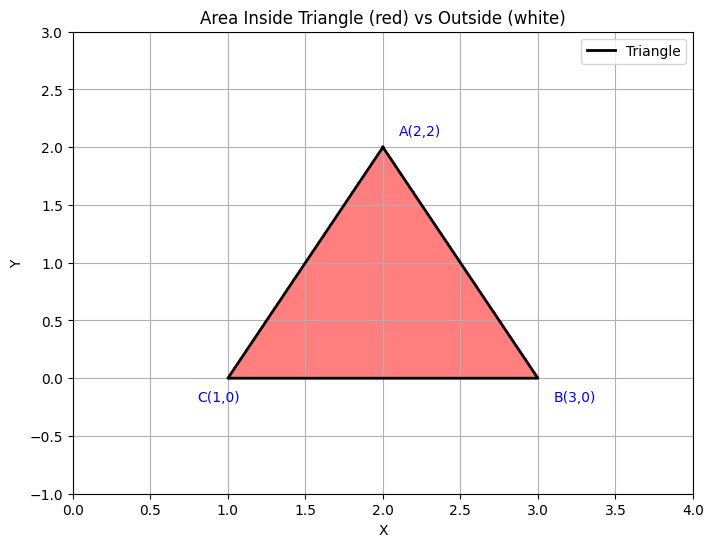

In [ ]:
x_vals = np.linspace(0, 4, 200)
y_vals = np.linspace(-1, 3, 200)
X, Y = np.meshgrid(x_vals, y_vals)

Z = np.array([[Area(x, y) for x in x_vals] for y in y_vals])

# Plot area
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, Z, levels=[-0.1, 0.5, 1.1], colors=['white', 'red'], alpha=0.5)

# Draw triangle edges
plt.plot([A[0], B[0], C[0], A[0]], [A[1], B[1], C[1], A[1]], 'k-', lw=2, label='Triangle')

# Add vertex labels
plt.text(A[0]+0.1, A[1]+0.1, f"A({A[0]},{A[1]})", fontsize=10, color='blue')
plt.text(B[0]+0.1, B[1]-0.2, f"B({B[0]},{B[1]})", fontsize=10, color='blue')
plt.text(C[0]-0.2, C[1]-0.2, f"C({C[0]},{C[1]})", fontsize=10, color='blue')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Area Inside Triangle (red) vs Outside (white)')
plt.grid(True)
plt.legend()
plt.show()


## **Random Point Classification**

### **generate random points**

In [ ]:
num_points = 2000
x_values = np.random.uniform(0, 4, num_points)
y_values = np.random.uniform(-1, 3, num_points)

### Classifing Points

In [ ]:
red_points = []
green_points = []

for i in range(num_points):
    result = Area(x_values[i], y_values[i])
    if result == 1:
        green_points.append((x_values[i], y_values[i]))
    else:
        red_points.append((x_values[i], y_values[i]))

red_x, red_y = zip(*red_points)
green_x, green_y = zip(*green_points)

### **Plot**

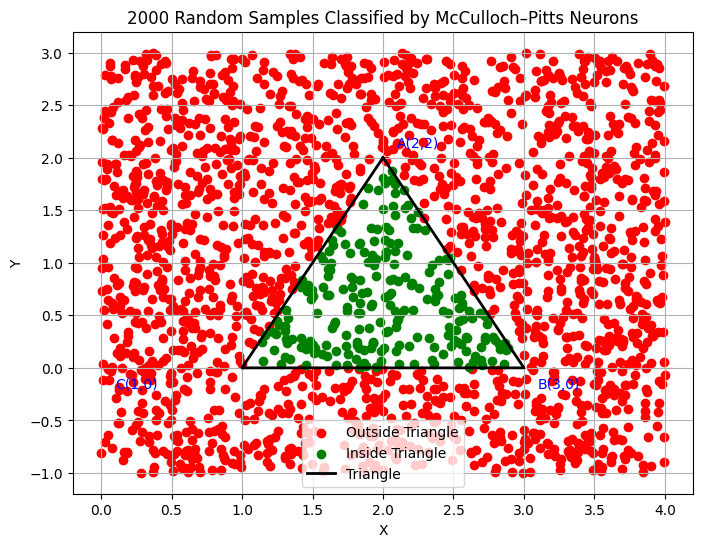

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(red_x, red_y, color='red', label='Outside Triangle')
plt.scatter(green_x, green_y, color='green', label='Inside Triangle')

# Draw triangle edges
plt.plot([A[0], B[0], C[0], A[0]], [A[1], B[1], C[1], A[1]], 'k-', lw=2, label='Triangle')
plt.text(A[0]+0.1, A[1]+0.1, "A(2,2)", fontsize=10, color='blue')
plt.text(B[0]+0.1, B[1]-0.2, "B(3,0)", fontsize=10, color='blue')
plt.text(C[0]-0.9, C[1]-0.2, "C(1,0)", fontsize=10, color='blue')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('2000 Random Samples Classified by McCulloch–Pitts Neurons')
plt.grid(True)
plt.legend()
plt.show()
